In [1]:
import sys, os, time, shutil, random
from pathlib import Path
if '_cwd' not in locals():
    _cwd = os.getcwd()
    os.chdir(Path(_cwd)/'..')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import numpy as np
np.set_printoptions(linewidth=120)
import pickle
from tabulate import tabulate
from tqdm.notebook import tqdm
import torch
from torch import nn, optim as opt
import torch.nn.functional as F
import torch.distributions as distrib
from torch.utils.data import Dataset, DataLoader, TensorDataset

%matplotlib notebook
import matplotlib.pyplot as plt

# from src.helix import helix_labels, helix_observations, ToyVAE
from src.shapes import ShapesVAE, ShapesDataset

import omnifig as fig

from omnilearn import util

# fig.initialize('sae')

2022-05-25 18:23:41.653087: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /is/ei/fleeb/miniconda3/lib/python3.8/site-packages/cv2/../../lib64:/is/ei/fleeb/.mujoco/mujoco200/bin
2022-05-25 18:23:41.653101: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
device = 'cuda'

In [12]:
model2 = ShapesVAE()
model2.load_state_dict(torch.load('model_a.pt'))

<All keys matched successfully>

In [13]:
from plethora import datasets

In [15]:
dataset = datasets.Shapes3D(download=False, mode=None).prepare()
len(dataset)

384000

In [34]:
class asdg:
    pass
self = asdg()

In [59]:

self.factor_order = ['floor_hue', 'wall_hue', 'object_hue', 'scale', 'shape', 'orientation']
self.factor_sizes = {'floor_hue': 10, 'wall_hue': 10, 'object_hue': 10,
                     'scale': 8, 'shape': 4, 'orientation': 15}
self._factor_steps = torch.as_tensor(np.array([self.factor_sizes[f] for f in self.factor_order] + [1])[::-1].cumprod()[-2::-1].copy())

In [61]:
self._factor_steps

tensor([48000,  4800,   480,    60,    15,     1])

In [3]:
data = ShapesDataset(download=True)

Copying gs://3d-shapes/3dshapes.h5...
| [1 files][255.2 MiB/255.2 MiB]                                                
Operation completed over 1 objects/255.2 MiB.                                    


Done.


In [16]:
data.images.shape

torch.Size([480000, 3, 64, 64])

In [34]:
seq = data.traverse_factor(5)#, base=data._factor_nums[0].long()-1)
seq.shape

torch.Size([15, 3, 64, 64])

<IPython.core.display.Javascript object>


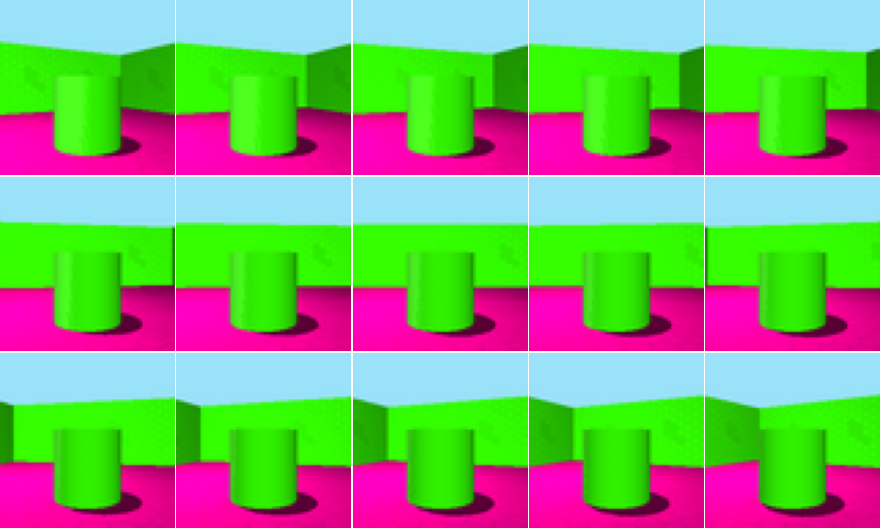

In [35]:
util.plot_imgs(seq);

In [31]:
torch.randint(100,)# size=())

TypeError: randint() received an invalid combination of arguments - got (int), but expected one of:
 * (int high, tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool requires_grad)
 * (int low, int high, tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool requires_grad)


In [16]:
batch = dataset.get_batch(batch_size=60)
X = batch['observation']
X.shape

torch.Size([60, 3, 64, 64])

<IPython.core.display.Javascript object>


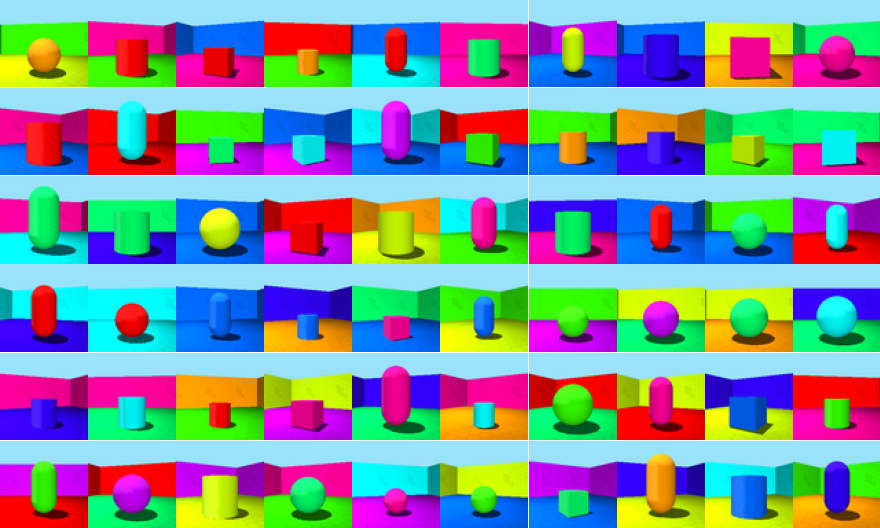

In [19]:
util.plot_imgs(X);

In [27]:
with torch.no_grad():
#     r1 = model(X.cuda()).cpu()
    r2 = model2.reconstruct(X.cuda()).cpu()
#     r2 = model2.decode(model2.encode(X.cuda()).cpu()
r1.shape

torch.Size([60, 3, 64, 64])

<IPython.core.display.Javascript object>


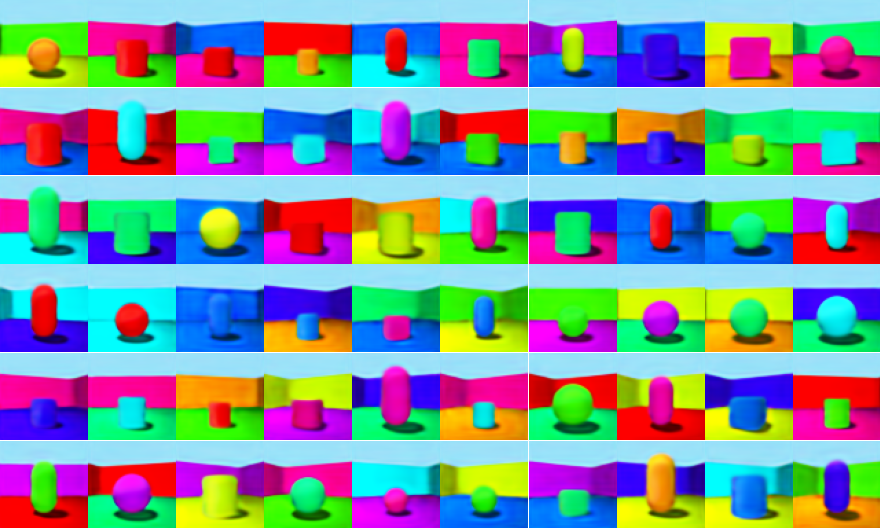

In [28]:
util.plot_imgs(r1);

In [4]:
root = Path('/is/ei/fleeb/workspace/chome/saved_models/lat_resp_models')
model_name = '3ds_vae4_d-conv_d24-s2_210523-164722'

In [5]:
run = fig.quick_run('load-run', path=str(root/model_name), **{'override.device':'cpu'})

| path: '/is/ei/fleeb/workspace/chome/saved_models/lat_resp_models/3ds_vae4_d-conv_d24-s2_210523-164722'
| [Pushed] path: '/is/ei/fleeb/workspace/chome/saved_models/lat_resp_models/3ds_vae4_d-conv_d24-s2_210523-164722'
| run: [<class 'omnifig.config.ConfigDict'>]
| CREATING . (type=sae-run) (mod={'cls-run': 3, 'inline': 5, 'timed-run': 1})
|  > invisible: False (by default)
|  > use_config_root: True (by default)
|  > .path: '/is/ei/fleeb/workspace/chome/saved_models/lat_resp_models/3ds_vae4_d-conv_d24-s2_210523-164722'
|  > silent: None (by default)
|  > invisible: False (by default)
|  > use_config_root: True (by default)
|  > .path: '/is/ei/fleeb/workspace/chome/saved_models/lat_resp_models/3ds_vae4_d-conv_d24-s2_210523-164722'
|  > [Pushed] path: '/is/ei/fleeb/workspace/chome/saved_models/lat_resp_models/3ds_vae4_d-conv_d24-s2_210523-164722'
|  > [Pushed] dataset._load-ckpt: '/is/ei/fleeb/workspace/chome/saved_models/lat_resp_models/3ds_vae4_d-conv_d24-s2_210523-164722/last'
|  > [

In [6]:
model = run.get_model()

| CREATING . (type=model)
|  > _load-ckpt: '/is/ei/fleeb/workspace/chome/saved_models/lat_resp_models/3ds_vae4_d-conv_d24-s2_210523-164722/last'
|  > model._model_mod [dict with 1 item/s]
|  >  > (hybrid): 1
|  > .seed: 2
|  > CREATING model (type=vae) (mod={'hybrid': 1})
|  >  > viz-gen-hybrid: True (by default)
|  >  > viz-gen-prior: True (by default)
|  >  > skip-expensive: False (by default)
|  >  > [Pushed] reg: None
|  >  > CREATING encoder (type=multilayer) (mod={'normal': 1})
|  >  >  > autosample: None (by default)
|  >  >  > constraint-eps --> epsilon: 1e-12 (by default)
|  >  >  > soft-constraint-transform: False (by default)
|  >  >  > modify-out-layer: True (by default)
|  >  >  > _dout_key: 'latent-dim'
|  >  >  > ..latent-dim: 24
|  >  >  > _din --> ..din [list with 3 item/s]
|  >  >  >  > (0): 3
|  >  >  >  > (1): 64
|  >  >  >  > (2): 64
|  >  >  > _dout --> latent-dim: 48
|  >  >  > in_order: True (by default)
|  >  >  > first: [<class 'omnifig.config.ConfigDict'>]
| 

Loaded parameters from /is/ei/fleeb/workspace/chome/saved_models/lat_resp_models/3ds_vae4_d-conv_d24-s2_210523-164722/last


In [7]:
model

Hybrid_VAE(
  (encoder): Normal_MultiLayer(
    (layers): ModuleList(
      (0): ConvLayer(
        residual=False
        (conv): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
        (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
        (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (1): ConvLayer(
        residual=False
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
        (norm): GroupNorm(8, 64, eps=1e-05, affine=True)
        (nonlin): ELU(alpha=1.0, inplace=True)
      )
      (2): ConvLayer(
        residual=False
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
        (norm): GroupNo

In [8]:
model.state_dict()['model']['parameters'].keys()

odict_keys(['_latent', 'encoder.layers.0.conv.weight', 'encoder.layers.0.conv.bias', 'encoder.layers.0.norm.weight', 'encoder.layers.0.norm.bias', 'encoder.layers.1.conv.weight', 'encoder.layers.1.conv.bias', 'encoder.layers.1.norm.weight', 'encoder.layers.1.norm.bias', 'encoder.layers.2.conv.weight', 'encoder.layers.2.conv.bias', 'encoder.layers.2.norm.weight', 'encoder.layers.2.norm.bias', 'encoder.layers.3.conv.weight', 'encoder.layers.3.conv.bias', 'encoder.layers.3.norm.weight', 'encoder.layers.3.norm.bias', 'encoder.layers.4.conv.weight', 'encoder.layers.4.conv.bias', 'encoder.layers.4.norm.weight', 'encoder.layers.4.norm.bias', 'encoder.layers.5.1.weight', 'encoder.layers.5.1.bias', 'encoder.layers.5.3.weight', 'encoder.layers.5.3.bias', 'encoder.layers.5.5.weight', 'encoder.layers.5.5.bias', 'decoder.layers.0.0.weight', 'decoder.layers.0.0.bias', 'decoder.layers.0.2.weight', 'decoder.layers.0.2.bias', 'decoder.layers.0.4.weight', 'decoder.layers.0.4.bias', 'decoder.layers.1.con

In [10]:
params_dict = {key.replace('layers.',''): val for key,val in model.state_dict()['model']['parameters'].items() if key not in {'_latent'}}
params_dict.keys()

dict_keys(['encoder.0.conv.weight', 'encoder.0.conv.bias', 'encoder.0.norm.weight', 'encoder.0.norm.bias', 'encoder.1.conv.weight', 'encoder.1.conv.bias', 'encoder.1.norm.weight', 'encoder.1.norm.bias', 'encoder.2.conv.weight', 'encoder.2.conv.bias', 'encoder.2.norm.weight', 'encoder.2.norm.bias', 'encoder.3.conv.weight', 'encoder.3.conv.bias', 'encoder.3.norm.weight', 'encoder.3.norm.bias', 'encoder.4.conv.weight', 'encoder.4.conv.bias', 'encoder.4.norm.weight', 'encoder.4.norm.bias', 'encoder.5.1.weight', 'encoder.5.1.bias', 'encoder.5.3.weight', 'encoder.5.3.bias', 'encoder.5.5.weight', 'encoder.5.5.bias', 'decoder.0.0.weight', 'decoder.0.0.bias', 'decoder.0.2.weight', 'decoder.0.2.bias', 'decoder.0.4.weight', 'decoder.0.4.bias', 'decoder.1.conv.weight', 'decoder.1.conv.bias', 'decoder.1.norm.weight', 'decoder.1.norm.bias', 'decoder.2.conv.weight', 'decoder.2.conv.bias', 'decoder.2.norm.weight', 'decoder.2.norm.bias', 'decoder.3.conv.weight', 'decoder.3.conv.bias', 'decoder.3.norm.w

In [11]:
# torch.save(params_dict, 'model_a.pt')